# Group Member 1's Working Notebook

## Description

Here's where I'd outline the goals of this specific notebook, and how they fit into the larger project goals

In [13]:
# Imports
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy import stats
import math  

conn = sqlite3.connect('../../data/im.db')

## Section

In [3]:
mob = pd.read_sql("""
SELECT *
FROM movie_budgets

""", conn)
mob

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [4]:
tn = pd.read_sql("""
SELECT * 
FROM the_numbers 
""", conn)
tn

,id0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [5]:
mb = pd.read_sql("""
SELECT * 
FROM movie_basics
""", conn)
mb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


We are investigating the relationship between directors and net profit. To do so, we will take the directors who have made at least 5 movies, sort by their net profit, and only keep the top 10. 

In [6]:
director_AGG = pd.read_sql("""
SELECT pe.primary_name as director, AVG(mob.worldwide_gross - mob.production_budget) as mean_net_profit, COUNT(pe.primary_name) as num_movies
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
GROUP BY pe.primary_name
HAVING num_movies > 5
ORDER BY mean_net_profit DESC
LIMIT 10
;
""", conn)
director_AGG

,director,mean_net_profit,num_movies
0,Tim Burton,1.908611e+08,6
1,Ridley Scott,1.769673e+08,7
2,Steven Spielberg,1.647550e+08,8
3,Jon M. Chu,1.502429e+08,6
4,Clint Eastwood,1.379160e+08,6
5,Jaume Collet-Serra,7.547862e+07,6
6,Denis Villeneuve,5.732786e+07,6
7,Tim Story,4.845786e+07,9
8,Steven Soderbergh,4.558173e+07,7
9,David Gordon Green,4.236483e+07,8


Calculating the sample mean manually

In [7]:
s_mu = (1.908611e+08+1.769673e+08+1.647550e+08+1.502429e+08+1.379160e+08+7.547862e+07+5.732786e+07+4.845786e+07+4.558173e+07+4.236483e+07) / 10	
s_mu

108995320.0

<Figure size 720x432 with 0 Axes>

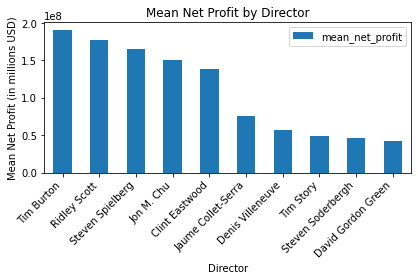

In [8]:
plt.figure(figsize=(10, 6))
director_AGG.plot.bar(x='director', y='mean_net_profit')
plt.title('Mean Net Profit by Director')
plt.xlabel('Director')
plt.ylabel('Mean Net Profit (in millions USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

calculating population mean and population standard deviation for t tests is done in other notebook

In [10]:
pop_avg = pd.read_sql("""
SELECT AVG(mob.worldwide_gross - mob.production_budget) as net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
;
""", conn)
pop_avg

,net_profit
0,6.656095e+07


In [11]:
director = pd.read_sql("""
SELECT pe.primary_name as director, (mob.worldwide_gross - mob.production_budget) as net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
;
""", conn)
director

,director,net_profit
0,Ethan Coen,42160680
1,Joel Coen,42160680
2,Anbarasan,-700000
3,Dexter Fletcher,22060480
4,Gary Ross,-26762748
...,...,...
3864,Joanna Wierig,-13627243
3865,Zefei Liu,45080579
3866,Chase Pottinger,45080579
3867,Yaser Talebi,-30147513


In [14]:
sample_mean = director_AGG['mean_net_profit'].mean()
sample_variance = ((director_AGG['mean_net_profit'] - sample_mean)**2).sum()/(len(director_AGG)-1)
sample_std = math.sqrt(sample_variance)
population_mean = director['net_profit'].mean()

t_test = (sample_mean - population_mean) / (sample_std/math.sqrt(10))

print("Sample mean of mean net profit:", sample_mean)
print("Sample standard deviation of mean net profit:", sample_std)
print("population mean of mean net profit:", population_mean)
print("t-test statistic:", t_test)

Sample mean of mean net profit: 108995329.64623015
Sample standard deviation of mean net profit: 60449890.53309928
population mean of mean net profit: 66560946.470664255
t-test statistic: 2.219843588726463


In [19]:
t_test = stats.ttest_1samp(director_AGG['mean_net_profit'], population_mean)
t_test

Ttest_1sampResult(statistic=2.2198435887264627, pvalue=0.05357772228437998)

NEED TO GO BACK TO WALTER's AND GRAB UNAGGREGATED DIRECTOR = query

ATTEMPT AT AN ANOVA test (this was later debunked by Abhineet)

In [ ]:
# burton = director[director.director == 'Tim Burton'].net_profit
# scott = director[director.director == 'Ridley Scott'].net_profit
# spielberg = director[director.director == 'Steven Spielberg'].net_profit
# chu = director[director.director == 'Jon M. Chu'].net_profit
# eastwood = director[director.director == 'Clint Eastwood'].net_profit
# serra = director[director.director == 'Jaume Collet-Serra'].net_profit
# villeneuve = director[director.director == 'Denis Villeneuve'].net_profit
# story = director[director.director == 'Tim Story'].net_profit
# soderbergh = director[director.director == 'Steven Soderbergh'].net_profit
# green = director[director.director == 'David Gordon Green'].net_profit

f_oneway(burton, scott, spielberg, chu, eastwood, serra, villeneuve, story, soderbergh, green)


snyder = director[director.director == 'Zack Snyder'].net_profit
lawrence = director[director.director == 'Francis Lawrence'].net_profit
burton = director[director.director == 'Tim Burton'].net_profit
scott = director[director.director == 'Ridley Scott'].net_profit
peyton = director[director.director == 'Brad Peyton'].net_profit
shyamalan = director[director.director == 'M. Night Shyamalan'].net_profit
feig = director[director.director == 'Paul Feig'].net_profit
spielberg = director[director.director == 'Steven Spielberg'].net_profit
anderson = director[director.director == 'Paul W.S. Anderson'].net_profit
chu = director[director.director == 'Jon M. Chu'].net_profit
eastwood = director[director.director == 'Clint Eastwood'].net_profit
ayer = director[director.director == 'David Ayer'].net_profit
russel = director[director.director == 'David O. Russel'].net_profit
stoller = director[director.director == 'Nicholas Stoller'].net_profit
fuqua = director[director.director == 'Antoine Fuqua'].net_profit

f_oneway(snyder, lawrence, burton, scott, peyton, shyamalan, feig, spielberg, anderson, chu, eastwood, ayer, russel, stoller, fuqua)

F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
pd.read_sql("""
SELECT pe.primary_name as director, (mob.worldwide_gross - mob.production_budget) as net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
;
""", conn)
director

In [ ]:
pop_mu = 5.827135e+07

pop_std = 1.443173e+08

stats.t.interval(alpha = 0.95, df = 9, loc = 108995320.0, scale = pop_std)

(-217473093.9024405, 435463733.9024405)

In [ ]:
t = (108995320.0- pop_mu) / (pop_std / 3)

In [ ]:
t

1.054425976650062

Hypothesis Test Section: We have a sample of 10 directors that we beleive far outperform the others. To test if the difference from the population is significant, I will do a t-test on the data. To perform a t test we need:
s_mu:
pop_mu:
s_sd:
s_n:




In [ ]:
pd.read_sql("""
SELECT AVG(mob.worldwide_gross - mob.production_budget) as net_profit
FROM movie_basics mb, principals pr, persons pe, movie_budgets mob
WHERE   mb.movie_id = pr.movie_id 
        AND pr.person_id = pe.person_id
        AND mb.primary_title = mob.movie
        AND pr.category = 'director'
;
""", conn)


,net_profit
0,6.656095e+07


In [ ]:
t = (108995329 - 5.827135e+07) / (60449890.53309928 / np.sqrt(10))
t

2.6534920776857542

The problem is, this was entirely manually calcualated. Need to talk to someone tomorrow to figure out how to calculate it using all python/sql.

Critical T Value

In [ ]:
t_crit = stats.t.ppf(1 - 0.05, df=29)
t_crit

1.6991270265334972

After looking at  the critical t value table, the critical t value is 1.699, which is significantly smaller than our observed t-statistic, meaning it is in the rejection region and we can reject the null hypothesis at a signifcance level of 0.05. 

,director,mean_net_profit,num_movies
0,Anna Rose Holmer,-758.0,1
1,Jordan Reyes,-1400.0,1
2,Benjamin Roberds,-1400.0,1
3,Jim Chuchu,-15000.0,1
4,Brandon Landers,-17300.0,1
...,...,...,...
1239,Daniel Beard,-79448583.0,1
1240,Candy J. Beard,-79448583.0,1
1241,Bambang Drias,-79448583.0,1
1242,Simon Wells,-110450242.0,1
